# LeNet

From Wikipedia, the free encyclopedia

LeNet is a convolutional neural network structure proposed by Yann LeCun et al. in 1998. In general, LeNet refers to lenet-5 and is a simple convolutional neural network. Convolutional neural networks are a kind of feed-forward neural network whose artificial neurons can respond to a part of the surrounding cells in the coverage range and perform well in large-scale image processing.

## Defining LeNet Class

In [83]:
import torch
import torch.nn as nn

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        
        #Convolutional layer: kernel size = (5,5), #kernels = 6, 
        #stride = (1,1)(default), padding = (0,0)(default), activation = Tanh()
        self.C1 = nn.Sequential(nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(5,5)), nn.Tanh()) 
                      
        #Pooling layer: average pooling, kernel size = (2,2), stride = (2,2), padding = (0,0)
        self.S2 = nn.AvgPool2d(kernel_size=(2,2), stride=(2,2))
        
        #Convolutional layer: kernel size = (5,5), #kernels = 16, stride = (1,1), padding = (0,0)
        #activation = Tanh()
        self.C3 = nn.Sequential(nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5,5)), nn.Tanh())
        
        #Pooling layer - average pooling, kernel size = (2,2), stride = (2,2), padding = (0,0)
        self.S4 = nn.AvgPool2d(kernel_size=(2,2), stride=(2,2))
        
        #Flatten from the second dimension (left out the first as it contains batch of images)
        self.Flttn = nn.Flatten(start_dim=1)
        
        #Fully connected layer
        self.F5 = nn.Sequential(nn.Linear(400, 120), nn.Tanh())
        
        #Fully connected layer
        self.F6 = nn.Sequential(nn.Linear(in_features=120, out_features=84), nn.Tanh())
        
        #Fully connected layer - Output layer
        self.F7 = nn.Linear(in_features=84, out_features=10)
        
        
    def forward(self, x):
        y = self.C1(x)
        y = self.S2(y)
        y = self.C3(y)
        y = self.S4(y)
        y = self.Flttn(y)
        y = self.F5(y)
        y = self.F6(y)
        y = self.F7(y)
        return y

### Creating an object of LeNet class

In [84]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = LeNet().to(device)

### Printing a summary of the network using 'torchsummary'

This module does not come with the PyTorch library. It has to be installed externally using the command "pip install torchsummary".

In [85]:
from torchsummary import summary

summary(net, input_size=(3, 32, 32), batch_size=8)

# summary(net, input_size=(3, 32, 32), batch_size=8, device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1             [8, 6, 28, 28]             456
              Tanh-2             [8, 6, 28, 28]               0
         AvgPool2d-3             [8, 6, 14, 14]               0
            Conv2d-4            [8, 16, 10, 10]           2,416
              Tanh-5            [8, 16, 10, 10]               0
         AvgPool2d-6              [8, 16, 5, 5]               0
           Flatten-7                   [8, 400]               0
            Linear-8                   [8, 120]          48,120
              Tanh-9                   [8, 120]               0
           Linear-10                    [8, 84]          10,164
             Tanh-11                    [8, 84]               0
           Linear-12                    [8, 10]             850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
---------------------------------

## Loading CFAR-10 dataset

In [86]:
import torch
from torchvision import datasets, transforms

#Loading training data
train = datasets.CIFAR10(
    root="", #Folder where the dataset to be stored; empty means stored in current folder
    train=True, #Download the 'training' dataset, False => download 'test' dataset
    download=True, #Should be 'True' in the first time downling the dataset, else 'False'
    transform=transforms.Compose([transforms.ToTensor()])
)

#Loading test data
test = datasets.CIFAR10(
    root="",
    train=False,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)

from torch.utils.data import DataLoader

trainDL = DataLoader(train, batch_size=16, shuffle=True)
testDL  = DataLoader(test, batch_size=16, shuffle=True)
print("Batch size = ", trainDL.batch_size)
print("Batch size = ", testDL.batch_size)

#Getting the first batch of images (randomly) and their labels
data_itr = iter(trainDL)
images, labels = data_itr.next()
print(images.shape)

Files already downloaded and verified
Files already downloaded and verified
Batch size =  16
Batch size =  16
torch.Size([16, 3, 32, 32])


### Display a batch of images

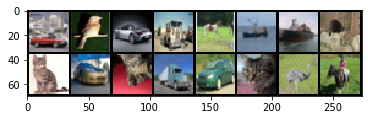

In [87]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision import utils

#Functions to show an image
def imshow(img):
    # img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
#Show images
imshow(utils.make_grid(images))

### Testing the forward pass is working or not with a batch of images

In [88]:
images=images.to(device)
out = net(images)

print("Output - ")
print(out)
print("Labels given by the LeNet (not trained yet) = ", out.argmax(dim=1))
print(labels)

Output - 
tensor([[ 0.0160,  0.0482,  0.0013, -0.1157, -0.0155, -0.0938,  0.0554, -0.1331,
          0.0889,  0.0282],
        [ 0.0216,  0.0447,  0.0206, -0.1172,  0.0027, -0.0847,  0.0730, -0.1382,
          0.0750,  0.0116],
        [ 0.0203,  0.0454,  0.0076, -0.1029, -0.0167, -0.0798,  0.0635, -0.1469,
          0.0885,  0.0038],
        [-0.0009,  0.0344, -0.0067, -0.1082, -0.0051, -0.0790,  0.0516, -0.1149,
          0.0619,  0.0038],
        [ 0.0159,  0.0232,  0.0099, -0.1239, -0.0106, -0.0803,  0.0618, -0.1218,
          0.0785,  0.0005],
        [ 0.0128,  0.0558,  0.0064, -0.0805, -0.0047, -0.0774,  0.0479, -0.1369,
          0.0718,  0.0162],
        [ 0.0076,  0.0903, -0.0173, -0.0858,  0.0032, -0.0877,  0.0323, -0.1419,
          0.0845,  0.0195],
        [ 0.0061,  0.0515,  0.0022, -0.0855, -0.0220, -0.0877,  0.0485, -0.1463,
          0.1088,  0.0107],
        [ 0.0030,  0.0424, -0.0117, -0.1131,  0.0002, -0.0921,  0.0496, -0.1110,
          0.0698,  0.0453],
        [

## Training

### Defining the loss function and optimizer

In [89]:
import torch.nn as nn
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(net.parameters())

### Model evaluation

In [90]:
import torch

def model_evaluation(dataloader, model, device):
    total = 0
    correct = 0
    
    for data in dataloader:
        imgs, lbls = data
        imgs = imgs.to(device)
        lbls = lbls.to(device)
        out = model(imgs)
        #Obtain the max values and its index (predicted class) of each output
        max_vals, pred_class = torch.max(out, dim=1)
        total += torch.numel(lbls)
        correct += (pred_class==lbls).sum().item()
        acc = (100.0*correct)/total
    
    return acc

### Training loop

In [91]:
epochs = 20

print("Started Training on", device, " ...")
for epoch in range(epochs):
    for data in trainDL:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        net_output = net(images)
        loss = loss_fn(net_output, labels)
        loss.backward()
        optimizer.step()
    
    train_acc = model_evaluation(trainDL, net, device)
    test_acc  = model_evaluation(testDL, net, device)
    
    print("Epoch: ", "{:4d}/{:4d} ==>".format(epoch+1,epochs), 
          " Test accuracy: ", "{:6.2f},".format(test_acc), 
          " Train accuracy: ", "{:6.2f}".format(train_acc))    
        
print('Finished Training.')
net = net.to('cpu') #Trained network bring back to the CPU as GPU has limited memory

Started Training on cuda  ...
Epoch:     1/  20 ==>  Test accuracy:   44.14,  Train accuracy:   44.86
Epoch:     2/  20 ==>  Test accuracy:   49.26,  Train accuracy:   51.26
Epoch:     3/  20 ==>  Test accuracy:   50.74,  Train accuracy:   53.83
Epoch:     4/  20 ==>  Test accuracy:   50.76,  Train accuracy:   55.33
Epoch:     5/  20 ==>  Test accuracy:   51.69,  Train accuracy:   56.98
Epoch:     6/  20 ==>  Test accuracy:   53.06,  Train accuracy:   58.82
Epoch:     7/  20 ==>  Test accuracy:   53.42,  Train accuracy:   60.68
Epoch:     8/  20 ==>  Test accuracy:   52.37,  Train accuracy:   60.94
Epoch:     9/  20 ==>  Test accuracy:   53.29,  Train accuracy:   62.15
Epoch:    10/  20 ==>  Test accuracy:   54.30,  Train accuracy:   65.15
Epoch:    11/  20 ==>  Test accuracy:   52.87,  Train accuracy:   63.26
Epoch:    12/  20 ==>  Test accuracy:   53.18,  Train accuracy:   63.94
Epoch:    13/  20 ==>  Test accuracy:   53.84,  Train accuracy:   66.46
Epoch:    14/  20 ==>  Test accura

## Predictions

### Getting predictions for the entire training set

In [96]:
import torch

@torch.no_grad() #Turning off gradient tracking for this function
def get_all_predictions(model, data_loader):
    all_preds = torch.tensor([])
    for batch in data_loader:
        imgs, lbls = batch
        pred_batch = model(imgs)
        all_preds = torch.cat(
            (all_preds, pred_batch), #Concatenate current predictions to 'all_preds'
            dim=0
        )
    return all_preds

In [97]:
predictions = get_all_predictions(net, testDL)
prediction_labels = predictions.argmax(dim=1)

print("Requires grad = ", predictions.requires_grad)
print("Gradient function = ", predictions.grad_fn)
print("Predictions = ", prediction_labels)
print("Shape - predictions = ", predictions.shape)

Requires grad =  False
Gradient function =  None
Predictions =  tensor([8, 7, 0,  ..., 9, 0, 3])
Shape - predictions =  torch.Size([10000, 10])


### Confusion matrix

In [98]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test.targets, prediction_labels)
print(cm)

[[ 97  91  93 103 104 102 105 103  94 108]
 [141 101  71 101  94 102 107 103  90  90]
 [118 106  71 106 100  95 109  98 103  94]
 [115 101  71 104  94 110 103 107  83 112]
 [106 119  65 104  90 103  99  95 119 100]
 [129 114  50  91  96 112 111 110  92  95]
 [116 108  50  96 115 109 103 115  83 105]
 [132 100  74  86 107 111  94 118  91  87]
 [132 104  67  86  94  91 116 105 102 103]
 [134  87  66  96 103 116 118 107  81  92]]


#### Confusion matrix plot

Confusion matrix, without normalization
[[ 97  91  93 103 104 102 105 103  94 108]
 [141 101  71 101  94 102 107 103  90  90]
 [118 106  71 106 100  95 109  98 103  94]
 [115 101  71 104  94 110 103 107  83 112]
 [106 119  65 104  90 103  99  95 119 100]
 [129 114  50  91  96 112 111 110  92  95]
 [116 108  50  96 115 109 103 115  83 105]
 [132 100  74  86 107 111  94 118  91  87]
 [132 104  67  86  94  91 116 105 102 103]
 [134  87  66  96 103 116 118 107  81  92]]


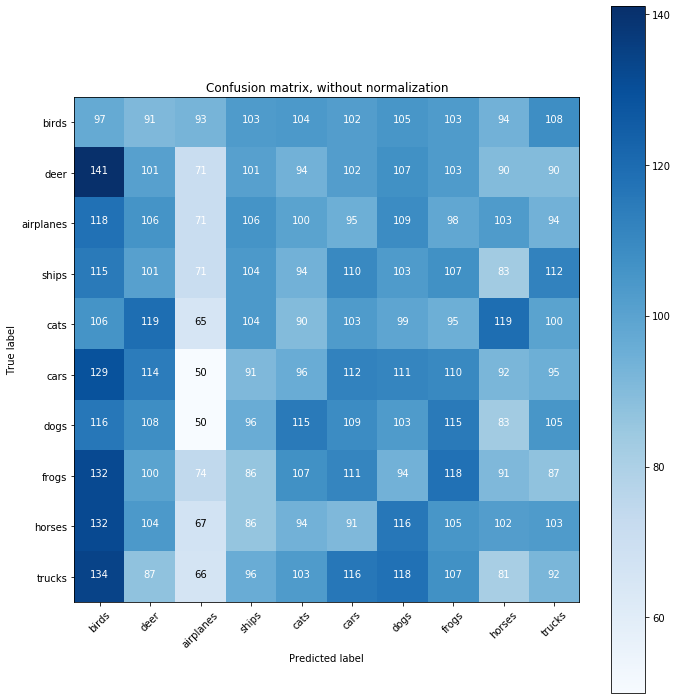

In [99]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


class_names = {'airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks'}

plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes=class_names, title= 'Confusion matrix, without normalization')
plt.show()

### Precision, recall and F1 score

In [100]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

precision = precision_score(test.targets, prediction_labels, average=None)
recall = recall_score(test.targets, prediction_labels, average=None)
f1 = f1_score(test.targets, prediction_labels, average=None)


with np.printoptions(precision=2, suppress=True):
    print("Precision of each class = ", precision*100) #Prints as a percentage
    print()
    print("Recall of each class    = ", recall*100)
    print()
    print("F1 score of each class  = ", f1*100)

Precision of each class =  [ 7.95  9.8  10.47 10.69  9.03 10.66  9.67 11.12 10.87  9.33]

Recall of each class    =  [ 9.7 10.1  7.1 10.4  9.  11.2 10.3 11.8 10.2  9.2]

F1 score of each class  =  [ 8.74  9.95  8.46 10.54  9.01 10.92  9.98 11.45 10.53  9.26]


## Feature maps of each layer

### Original images (First batch)

torch.Size([16, 3, 32, 32])


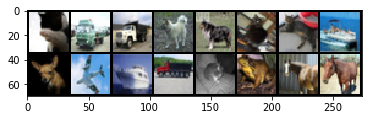

In [143]:
data_itr = iter(testDL)
images, labels = data_itr.next()
print(images.shape)

imshow(utils.make_grid(images))

### C1 convolutional layer

#### Feature maps

In [166]:
def show_feature_maps (feature_maps, plot_height, plot_width):
    n_batches      = feature_maps.shape[0]
    n_channels     = feature_maps.shape[1]
    height         = feature_maps.shape[2]
    width          = feature_maps.shape[3] 
    
    fig, ax = plt.subplots(nrows=n_batches, ncols=n_channels, figsize=(plot_width,plot_height))
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
    
    for row in range(n_batches):
        for col in range(n_channels):
            # ax[row][col].imshow(out[row,col].detach())
            ax[row][col].imshow(feature_maps[row,col].detach(), cmap='Greys',  interpolation='nearest')
            
    plt.tight_layout()
    plt.show()

torch.Size([16, 6, 28, 28])
<class 'numpy.ndarray'>


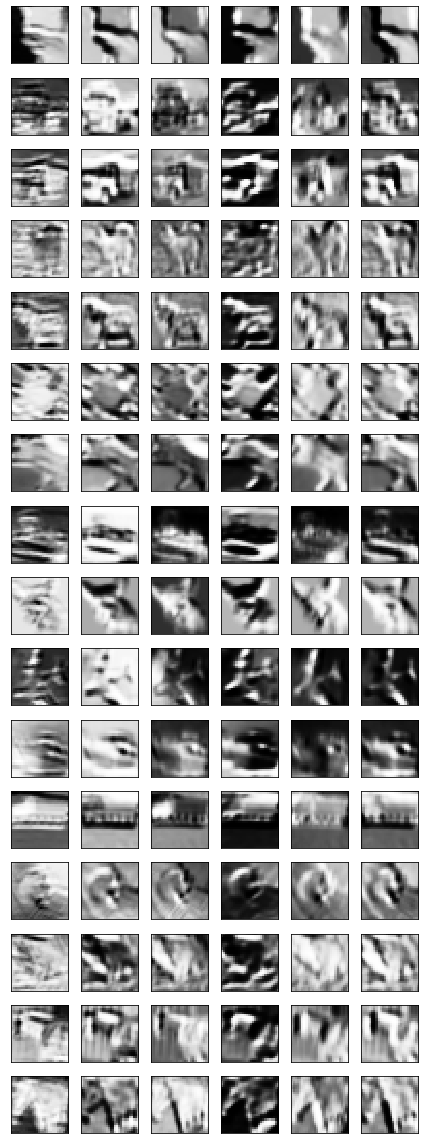

In [167]:
C1_out = net.C1(images)

with torch.no_grad():
    C1_out = C1_out.detach()
print(C1_out.shape)
print(type(C1_out.numpy()))

show_feature_maps(C1_out, 16, 6)

#### Filters (Kernels)

torch.Size([6, 3, 5, 5])


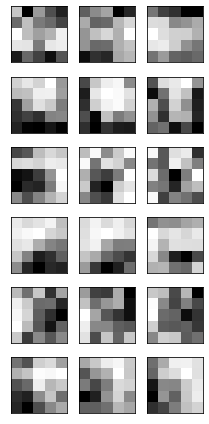

In [168]:
print(net.C1[0].weight.shape) #Shape of the weight matrix
show_feature_maps(net.C1[0].weight, 6, 3)

### S2 pooling layer

torch.Size([16, 6, 14, 14])


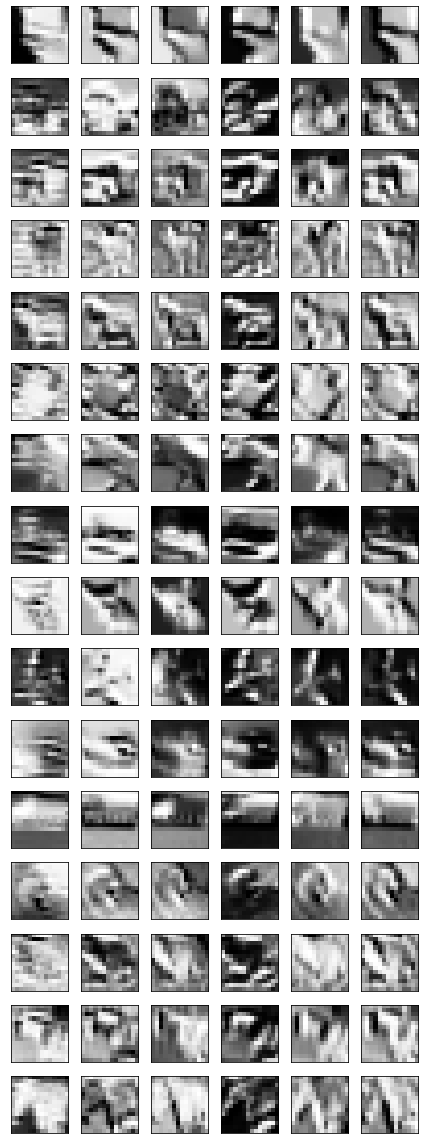

In [173]:
S2_out = net.S2(C1_out)

print(S2_out.shape)
show_feature_maps(S2_out, 16, 6)

### C3 convolutional layer

#### Feature maps

torch.Size([16, 16, 10, 10])


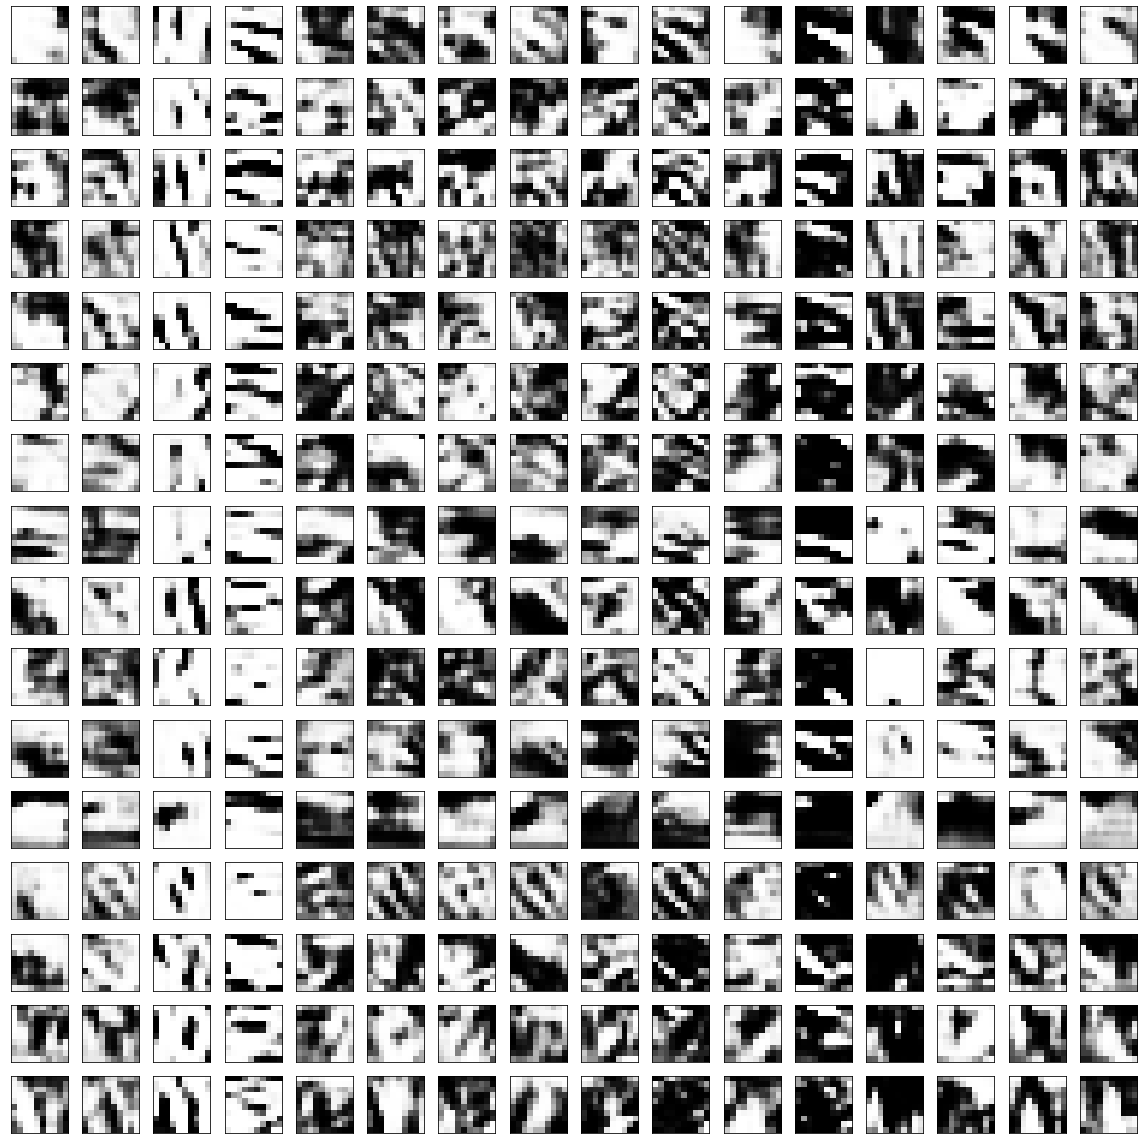

In [176]:
C3_out = net.C3(S2_out)
print(C3_out.shape)
show_feature_maps(C3_out, 16, 16)

#### Filters (Kernels)

torch.Size([16, 6, 5, 5])


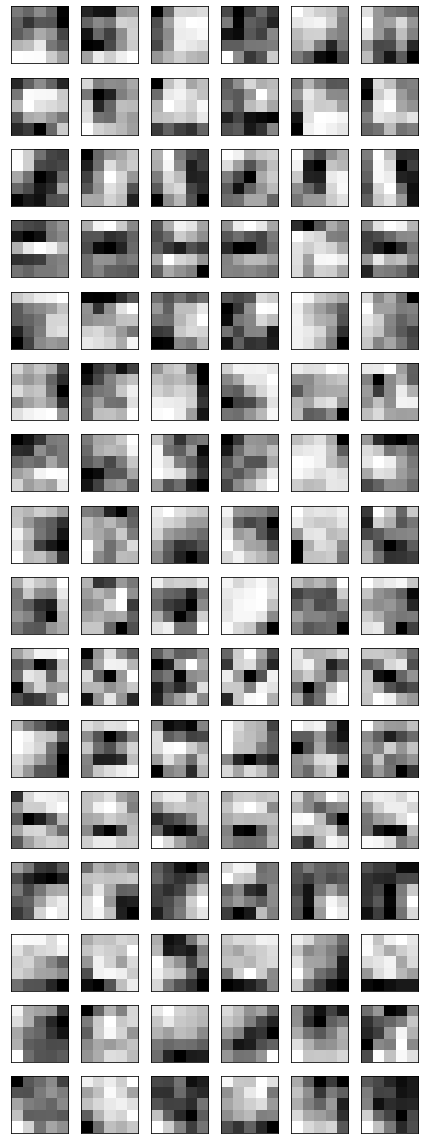

In [178]:
print(net.C3[0].weight.shape) #Shape of the weight matrix
show_feature_maps(net.C3[0].weight, 16, 6)

## Extra materials

### Flatten

#### Method

#### Method 2

### Softmax

#### Method 1

#### Method 2

### Model Summary

#### If your model is run only on a CPU

#### If your model is run on a GPU

In [ ]:
from torchsummary import summary

device = torch.device('cuda')

netGPU = LeNet().to(device)

summary(netGPU, input_size=(3, 32, 32), batch_size=8, device='cuda')

#### If a GPU is available, run the model on GPU, else on CPU

### One-hot encoding

One-hot encoding does not need for classification problems in PyTorch as it already incorperated into Pytorch library.

### Removing gradient calculations

#### Method 1 - Decorating the function at the top with the command '@torch.no_grad()'

#### Method2 - When calling the function

### Precision, recall and F1 score

#### Precision

**Precision** is the ratio of correctly predicted positive observations to the total predicted positive observations. High precision relates to the low false positive rate.

$Precision = \frac{TP}{TP+FP}$

#### Recall

**Recall (Sensitivity)** is the ratio of correctly predicted positive observations to the all observations in actual class - yes.

$Recall = \frac{TP}{TP+FN}$

#### F1 score

**F1 Score** is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

$F1\_Score = 2*\frac{Recall * Precision}{Recall + Precision}$